$\epsilon$


In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit as cf
import math
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d


In [2]:
def app_beta_lambda(N,tbeta,tlambda):
    G= 6.67 * (1e-11)
    M= 1.988*(1e+30)
    T= 365
    v_earth= np.cbrt(2*(np.pi)*G*M/(T*24*3600))
    c= 3*(1e+8)
    
    n=np.where(N>365,N-365,N)
    
    alpha=v_earth/c
    gamma=np.sqrt(1/(1-alpha*alpha))
    tphi= 90+tlambda-360*n/365
    #print("gamma", gamma)
    #print("alpha" ,alpha)

    
    sin_tbeta= np.sin(np.deg2rad(tbeta))
    cos_tbeta = np.cos(np.deg2rad(tbeta))
    sin_tphi= np.sin(np.deg2rad(tphi))
    cos_tphi= np.cos(np.deg2rad(tphi))
    
   
                     
    sin_abeta= (gamma*sin_tbeta)/(1+alpha*cos_tbeta*cos_tphi)
    tan_aphi=  (gamma*cos_tbeta*sin_tphi)/(alpha+cos_tbeta*cos_tphi)
    
    #print("tan_aphi" ,tan_aphi)
                     
    abeta = np.degrees(np.arcsin(sin_abeta))+360
    #CHEP_CHAP
    aphi=np.degrees(np.arctan(tan_aphi))
    
    
    
    
    
    alambda=aphi-90+360*n/365
    
    alambda=np.where(alambda<-90,alambda+180,alambda)
    alambda=np.where(alambda>90,alambda-180,alambda)
    
    #return(np.array([abeta,alambda]).T)
    output=np.where(N>365,alambda,abeta)
    return(output)
    
                     
    
    
    

G= 6.67 * (1e-11)
M= 1.988*(1e+30)
T= 365
v_earth= np.cbrt(2*(np.pi)*G*M/(T*24*3600))

    

In [4]:
print(v_earth)

29783.23204361639


In [5]:
print(np.arcsin(1))

1.5707963267948966


In [6]:
Data=pd.read_csv("StellarAbberationsData.csv").to_numpy()



In [7]:
n=Data[:,0]
abeta=Data[:,1]
alambda=Data[:,2]

In [8]:
y= Data[:,1:3]
print(y)

[[292.68238203  27.96247951]
 [292.68227868  27.96249611]
 [292.68217466  27.96251197]
 [292.68207     27.9625271 ]
 [292.68196472  27.96254147]
 [292.68185886  27.96255509]
 [292.68175245  27.96256796]
 [292.68164553  27.96258006]
 [292.68153811  27.9625914 ]
 [292.68143025  27.96260198]
 [292.68132195  27.96261178]
 [292.68121327  27.96262082]
 [292.68110423  27.96262907]
 [292.68099486  27.96263655]
 [292.68088519  27.96264325]
 [292.68077527  27.96264916]
 [292.68066511  27.96265429]
 [292.68055476  27.96265864]
 [292.68044424  27.9626622 ]
 [292.6803336   27.96266497]
 [292.68022285  27.96266695]
 [292.68011204  27.96266815]
 [292.68000119  27.96266855]
 [292.67989032  27.96266816]
 [292.67977951  27.96266699]
 [292.67966876  27.96266502]
 [292.67955811  27.96266227]
 [292.67944759  27.96265873]
 [292.67933723  27.9626544 ]
 [292.67922707  27.96264928]
 [292.67911714  27.96264338]
 [292.67900747  27.9626367 ]
 [292.6788981   27.96262924]
 [292.67878905  27.962621  ]
 [292.67868036

In [9]:
ynew=np.hstack([abeta,alambda]).T
nnew=np.hstack([n,n+365]).T
print(nnew)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 

In [10]:
print(app_beta_lambda(n,abeta,alambda))

[292.68000049 292.67997801 292.67995554 292.67993309 292.67991065
 292.67988825 292.67986587 292.67984354 292.67982125 292.67979902
 292.67977684 292.67975473 292.6797327  292.67971074 292.67968887
 292.67966709 292.67964541 292.67962383 292.67960237 292.67958102
 292.6795598  292.67953871 292.67951775 292.67949691 292.67947625
 292.67945573 292.67943538 292.6794152  292.67939519 292.67937536
 292.67935571 292.67933625 292.67931699 292.67929793 292.67927908
 292.67926044 292.67924201 292.67922381 292.67920584 292.67918811
 292.67917061 292.67915336 292.67913636 292.67911961 292.67910313
 292.6790869  292.67907095 292.67905527 292.67903987 292.67902475
 292.67900992 292.67899538 292.67898114 292.6789672  292.67895356
 292.67894023 292.67892722 292.67891452 292.67890213 292.67889008
 292.67887835 292.67886695 292.67885588 292.67884516 292.67883477
 292.67882472 292.67881503 292.67880568 292.67879668 292.67878804
 292.67877975 292.67877183 292.67876426 292.67875706 292.67875023
 292.67874

In [11]:
tbeta,tlambda=cf(app_beta_lambda,nnew,ynew,(292,27))[0]

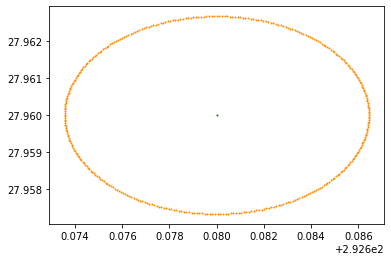

In [12]:
plt.scatter(y[:,0],y[:,1],label='OG_Data',s=1,color='darkorange')
plt.scatter(tbeta,tlambda,label='OG_Data',s=1,color='green')


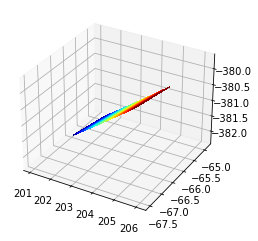

In [15]:

import mpl_toolkits.mplot3d.axes3d as axes3d

theta, phi = y[:,1],y[:,0]
THETA, PHI = np.meshgrid(theta, phi)
R = 437
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=1)

plt.show()